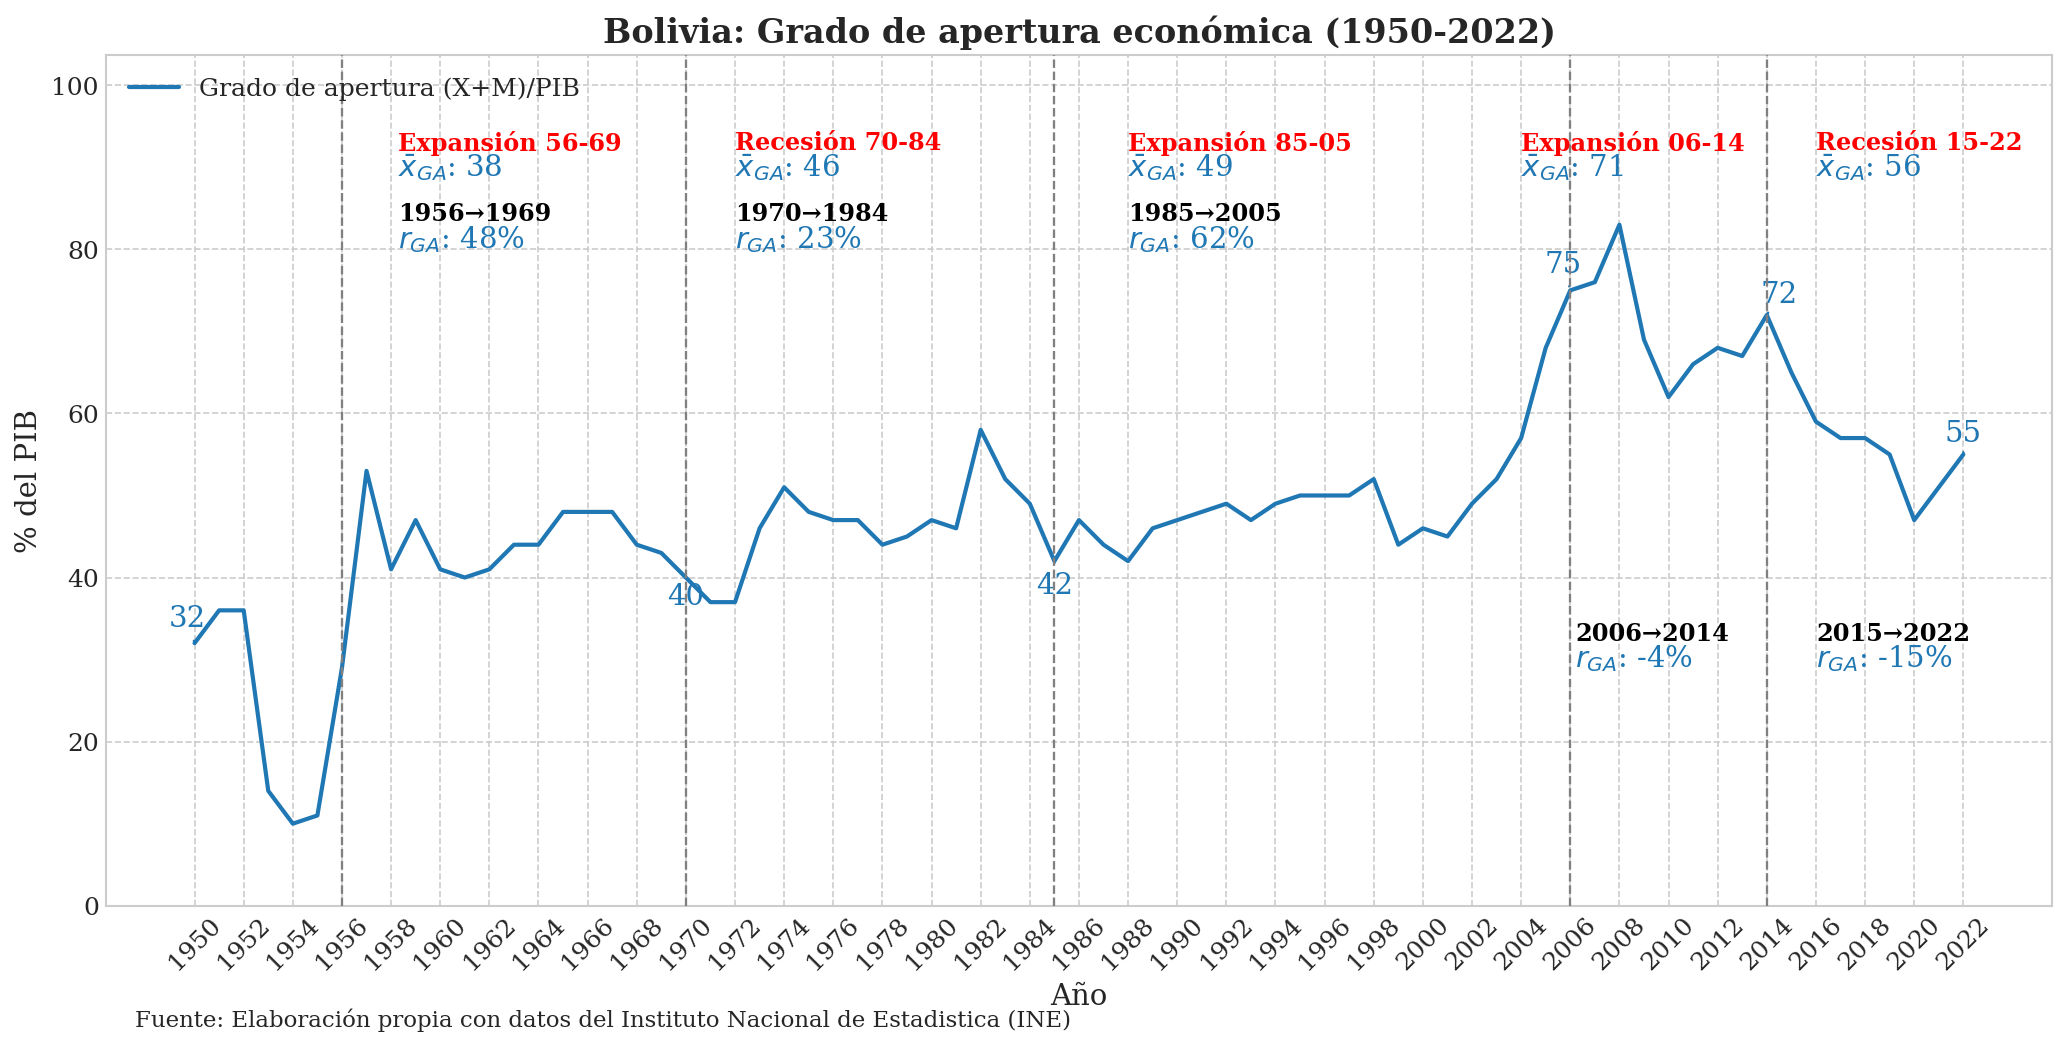

In [1]:
# ─────────────────── Grado de Apertura Económica 1950-2022 ───────────────────
import pandas as pd
import sys
import matplotlib.pyplot as plt
import sqlite3, os
sys.path.append(os.path.abspath('../'))
from graficos_utils import *
from config import *


# ── 1. Configuración general de la figura y salida ───────────────────────────
output_dir = "../../../assets/tesis/serie_completa"
os.makedirs(output_dir, exist_ok=True)  

set_style()

# ── 2. Carga de tabla grado_de_apertura ──────────────────────────────────────
db_path = '../../../db/proyectomacro.db'
query   = "SELECT * FROM grado_de_apertura"        # columnas: año, grado
df = get_df(query, db_path,rename={'grado':'GA'})

# ── 3. Estadísticas por ciclo (medias) ───────────────────────────────────────
CYCLES=adjust_cycles(df,CYCLES_SIN_CRISIS)
cycle_stats = {
    name: df.loc[period].mean().to_dict()
    for name, period in CYCLES.items()
}
annotate_years    = adjust_annot_years(df, annot_years)
periodos= adjust_periods(df, periodos_tasas_sin_crisis)
component_colors = {
    'GA': '#1f77b4'
}

# ── 4. Líneas verticales de hitos (mismos años que el gráfico de PIB) ───────

annotation_offsets = {
    "GA": {
        1950: (-0.3,  3.0),
        1970: ( 0.0, -2.3),
        1985: ( 0.0, -3.0),
        2006: (-0.3,  3.2),
        2014: ( 0.5,  2.5),
        2022: ( 0.0,  2.5),
    }
}

hitos_offset = {
    1956: 0.50,
    1970: 0.50,
    2014: 0.50,
}

tasas_offsets = {
    "1956-1969": (1958.3, 0.99),
    "1970-1984": (1972.0, 0.99),
    "1985-2005": (1988.0, 0.99),
    "2006-2014": (2006.2, 0.40),
    "2015-2022": (2016.0, 0.40),
}

means_offsets = {
    "Expansión 56-69": (1958.3, 1.09),
    "Recesión 70-84":  (1972.0, 1.09),
    "Expansión 85-05": (1988.0, 1.09),
    "Expansión 06-14": (2004.0, 1.09),
    "Recesión 15-22":  (2016.0, 1.09),
}
# ── 6. Graficar ──────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))

# Serie principal
ax.plot(df.index, df['GA'], color='tab:blue', label='Grado de apertura (X+M)/PIB')
y_max = ax.get_ylim()[1]
add_hitos(ax, df.index, hitos_v_sin_crisis, hitos_offset)
#anotaciones de tasas


abbr_map = {
    "GA":"GA",
}
columnas=["GA"]
add_year_value_annotations(ax,df,annotate_years,columnas,annotation_offsets,component_colors)
add_period_growth_annotations_multi(
    ax, df, periodos,
    columnas,
    tasas_offsets,
    component_colors,
    abbr_map,
)
add_cycle_means_multi(
    ax,
    cycle_stats,
    means_offsets,
    abbr_map,
    component_colors,
    line_spacing=y_max*0.03
)

# Etiquetas y formato
ax.set_title("Bolivia: Grado de apertura económica (1950-2022)", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("% del PIB")
ax.set_ylim(0, df['GA'].max()*1.25)
ax.set_xticks(range(1950, 2023, 2))
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')

fig.text(0.07, 0.01,
         "Fuente: Elaboración propia con datos del Instituto Nacional de Estadistica (INE)",
         ha='left', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "grado_de_apertura_1.png"))
plt.show()

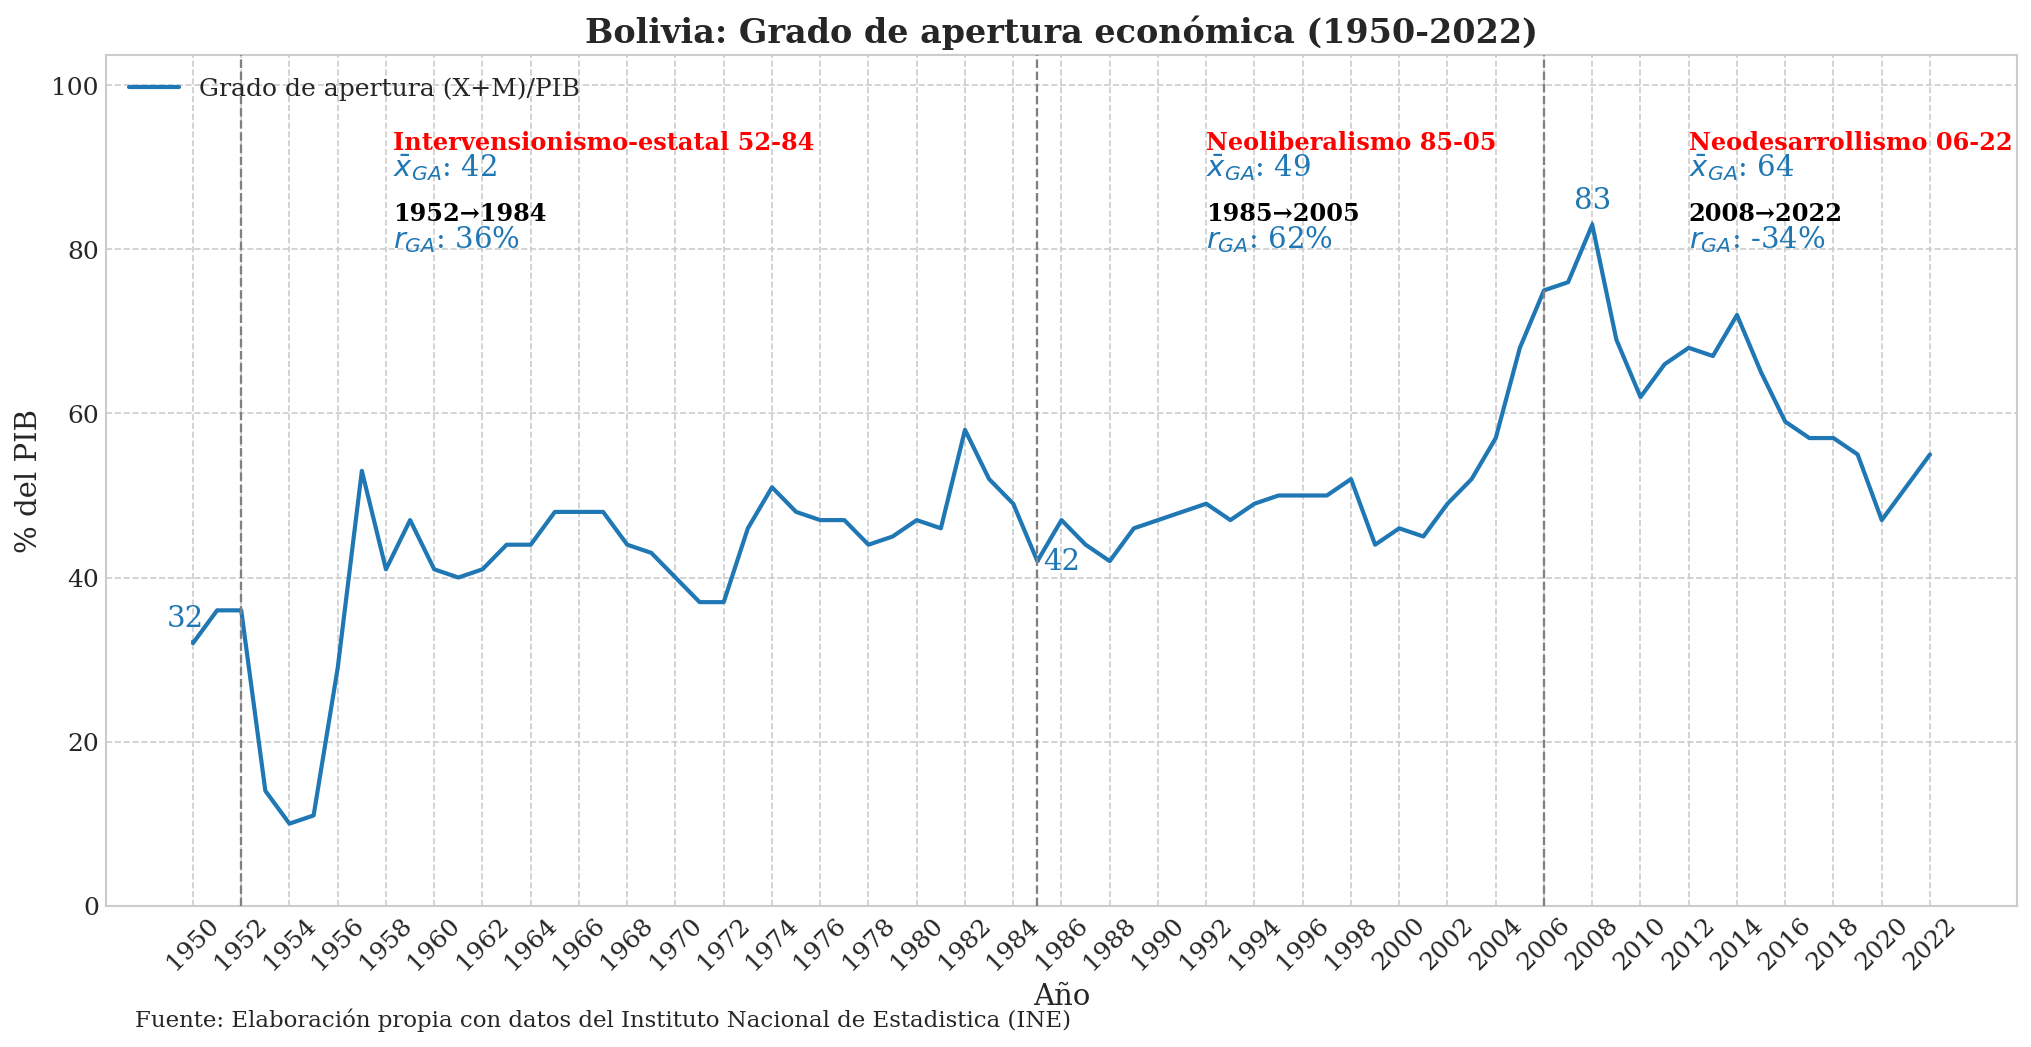

In [5]:

# ── 3. Estadísticas por ciclo (medias) ───────────────────────────────────────
CYCLES_PERIODOS=adjust_cycles(df,CYCLES_PERIODOS)
cycle_stats_periodos = {
    name: df.loc[period].mean().to_dict()
    for name, period in CYCLES_PERIODOS.items()
}
component_colors = {
    'GA': '#1f77b4'
}


annotation_offsets = {
    "GA": {
        1950: (-0.3,  3.0),
        1985: ( 1.0,  0),
        2008: (0,  3.0),
    }
}

hitos_offset = {
    1950: 0.92, 1985: 0.50, 2006: 0.50,
}

tasas_offsets = {
    "1952-1984": (1958.3, 0.99),
    "1985-2005": (1992, 0.99),
    "2008-2022": (2012, 0.99),
}
means_offsets = {
    "Intervensionismo-estatal 52-84": (1958.3,  1.09),
    "Neoliberalismo 85-05":  (1992, 1.09),
    "Neodesarrollismo 06-22": (2012, 1.09),
}
# ── 6. Graficar ──────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))

# Serie principal
ax.plot(df.index, df['GA'], color='tab:blue', label='Grado de apertura (X+M)/PIB')
y_max = ax.get_ylim()[1]
add_hitos(ax, df.index, hitos_v_periodos, hitos_offset)
#anotaciones de tasas
periodos = [(1952,1984),(1985,2005),(2008,2022)]
anot_years = [1950,1985,2008,2022]
abbr_map = {
    "GA":"GA",
}
columnas=["GA"]
add_year_value_annotations(ax,df,anot_years,columnas,annotation_offsets,component_colors)
add_period_growth_annotations_multi(
    ax, df, periodos,
    columnas,
    tasas_offsets,
    component_colors,
    abbr_map,
)
add_cycle_means_multi(
    ax,
    cycle_stats_periodos,
    means_offsets,
    abbr_map,
    component_colors,
    line_spacing=y_max*0.03
)

# Etiquetas y formato
ax.set_title("Bolivia: Grado de apertura económica (1950-2022)", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("% del PIB")
ax.set_ylim(0, df['GA'].max()*1.25)
ax.set_xticks(range(1950, 2023, 2))
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')

fig.text(0.07, 0.01,
         "Fuente: Elaboración propia con datos del Instituto Nacional de Estadistica (INE)",
         ha='left', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "grado_de_apertura_2.png"))
plt.show()

In [3]:
cycle_stats_periodos

{'Intervensionismo-estatal 52-84': {'GA': 41.696969696969695},
 'Neoliberalismo 85-05': {'GA': 48.76190476190476},
 'Neodesarrollismo 06-22': {'GA': 63.76470588235294}}